In [1]:
import sqlite3
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from forex_python.converter import CurrencyRates

In [2]:
conn = sqlite3.connect('data/noshow.db')
df = pd.read_sql_query("SELECT * FROM noshow", conn)

In [3]:
df.isna().sum()

booking_id            0
no_show               1
branch                1
booking_month         1
arrival_month         1
arrival_day           1
checkout_month        1
checkout_day          1
country               1
first_time            1
room              21613
price             24882
platform              1
num_adults            1
num_children          1
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119391 entries, 0 to 119390
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   booking_id      119391 non-null  int64  
 1   no_show         119390 non-null  float64
 2   branch          119390 non-null  object 
 3   booking_month   119390 non-null  object 
 4   arrival_month   119390 non-null  object 
 5   arrival_day     119390 non-null  float64
 6   checkout_month  119390 non-null  object 
 7   checkout_day    119390 non-null  float64
 8   country         119390 non-null  object 
 9   first_time      119390 non-null  object 
 10  room            97778 non-null   object 
 11  price           94509 non-null   object 
 12  platform        119390 non-null  object 
 13  num_adults      119390 non-null  object 
 14  num_children    119390 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 13.7+ MB


In [5]:
df[['price']] = df[['price']].fillna('SGD$ 0.00')

In [6]:
df = df.dropna(axis=0, inplace=False)

In [7]:
df.reset_index()

index  booking_id  no_show   branch booking_month arrival_month  \
0           0       94113      0.0   Changi      November          June   
1           1       86543      0.0  Orchard        August      November   
2           2       75928      0.0   Changi         March      February   
3           3       66947      1.0  Orchard     September       October   
4           4      106390      0.0  Orchard         March          June   
...       ...         ...      ...      ...           ...           ...   
97773  119385       56220      0.0  Orchard      November          June   
97774  119386        4823      0.0   Changi     September         April   
97775  119387       25062      0.0  Orchard         March      December   
97776  119388       81936      1.0   Changi     September         March   
97777  119390       99643      0.0   Changi         March          July   

       arrival_day checkout_month  checkout_day    country first_time    room  \
0             25.0           June          27.0  Singapore        Yes  Single   
1             28.0       November          29.0  Indonesia        Yes    King   
2              7.0       February          11.0      India        Yes  Single   
3              1.0        October           3.0      China        Yes  Single   
4             20.0           June          24.0  Australia        Yes   Queen   
...            ...            ...           ...        ...        ...     ...   
97773         15.0           June          16.0      China        Yes    King   
97774          3.0          April           5.0      China        Yes    King   
97775         30.0        January           3.0      China        Yes    King   
97776         31.0          April           1.0  Indonesia        Yes    King   
97777         18.0           July          26.0      India        Yes    King   

              price platform num_adults  num_children  
0       SGD$ 492.98  Website          1           0.0  
1      SGD$ 1351.22  Website          2           0.0  
2         SGD$ 0.00    Agent          1           0.0  
3       SGD$ 666.04  Website          1           0.0  
4       USD$ 665.37  Website          1           0.0  
...             ...      ...        ...           ...  
97773     SGD$ 0.00  Website          2           1.0  
97774   USD$ 612.18  Website          1           1.0  
97775  USD$ 1041.29    Email          2           0.0  
97776   USD$ 641.47    Email          1           2.0  
97777   SGD$ 901.95  Website          1           2.0  

[97778 rows x 16 columns]

In [8]:
df.set_index('booking_id')

no_show   branch booking_month arrival_month  arrival_day  \
booking_id                                                              
94113           0.0   Changi      November          June         25.0   
86543           0.0  Orchard        August      November         28.0   
75928           0.0   Changi         March      February          7.0   
66947           1.0  Orchard     September       October          1.0   
106390          0.0  Orchard         March          June         20.0   
...             ...      ...           ...           ...          ...   
56220           0.0  Orchard      November          June         15.0   
4823            0.0   Changi     September         April          3.0   
25062           0.0  Orchard         March      December         30.0   
81936           1.0   Changi     September         March         31.0   
99643           0.0   Changi         March          July         18.0   

           checkout_month  checkout_day    country first_time    room  \
booking_id                                                              
94113                June          27.0  Singapore        Yes  Single   
86543            November          29.0  Indonesia        Yes    King   
75928            February          11.0      India        Yes  Single   
66947             October           3.0      China        Yes  Single   
106390               June          24.0  Australia        Yes   Queen   
...                   ...           ...        ...        ...     ...   
56220                June          16.0      China        Yes    King   
4823                April           5.0      China        Yes    King   
25062             January           3.0      China        Yes    King   
81936               April           1.0  Indonesia        Yes    King   
99643                July          26.0      India        Yes    King   

                   price platform num_adults  num_children  
booking_id                                                  
94113        SGD$ 492.98  Website          1           0.0  
86543       SGD$ 1351.22  Website          2           0.0  
75928          SGD$ 0.00    Agent          1           0.0  
66947        SGD$ 666.04  Website          1           0.0  
106390       USD$ 665.37  Website          1           0.0  
...                  ...      ...        ...           ...  
56220          SGD$ 0.00  Website          2           1.0  
4823         USD$ 612.18  Website          1           1.0  
25062       USD$ 1041.29    Email          2           0.0  
81936        USD$ 641.47    Email          1           2.0  
99643        SGD$ 901.95  Website          1           2.0  

[97778 rows x 14 columns]

In [9]:
df= df.astype('str')

<h2>Data Cleaning: Dates</h2>

In [10]:
df['booking_day'] ='1'
df['arrival_year'] = '2020'

In [11]:
df['arrival_month'] = df['arrival_month'].str.lower()
df['booking_month'] = df['booking_month'].str.lower()
df['checkout_month'] = df['checkout_month'].str.lower()

In [12]:
look_up = {'january': 1, 'february':2, 'march':3, 'april':4, 'may':5, 'june':6, 'july':7, 'august':8, 'september':9, 'october':10, 
           'november':11, 'december':12}

df['arrival_month'] = df['arrival_month'].apply(lambda x: look_up[x])
df['booking_month'] = df['booking_month'].apply(lambda x: look_up[x])
df['checkout_month'] = df['checkout_month'].apply(lambda x: look_up[x])

In [13]:
#df['arrival_month'] = df['arrival_month'].astype('int64')
#df['booking_month'] = df['booking_month'].astype('int64')

In [14]:
def f(row):
    if row['booking_month'] > row['arrival_month']:
        val = '2019'
    else:
        val = '2020'
    return val

In [15]:
df['booking_year'] = df.apply(f, axis=1)

In [16]:
def c(row):
    if row['arrival_month'] > row['checkout_month']:
        val = '2021'
    else:
        val = '2020'
    return val

In [17]:
df['checkout_year'] = df.apply(c, axis=1)

In [18]:
df['arrival_day'] = df['arrival_day'].str[:-2]
df['checkout_day'] = df['checkout_day'].str[:-2]

In [19]:
df['arrival_day'] =df['arrival_day'].astype('int64')
df['checkout_day'] =df['checkout_day'].astype('int64')

In [20]:
df['arrival_day']=df['arrival_day'].abs()
df['checkout_day'] =df['checkout_day'].abs()

In [21]:
cols=["arrival_year", "arrival_month","arrival_day"]
df['arrival_date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [22]:
cols=["booking_year", "booking_month","booking_day"]
df['booking_date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [23]:
cols=["checkout_year", "checkout_month","checkout_day"]
df['checkout_date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [24]:
df['arrival_date'] =  pd.to_datetime(df['arrival_date'], format='%Y-%m-%d')
df['booking_date'] =  pd.to_datetime(df['booking_date'], format='%Y-%m-%d')
df['checkout_date'] =  pd.to_datetime(df['checkout_date'], format='%Y-%m-%d')

<h2>Data Cleaning: Currency Conversion to SGD</h2>

In [25]:
df[['currency', 'SGD_amount']] = df['price'].str.split('$', 1, expand=True)

In [26]:
c = CurrencyRates()
currency = c.get_rate('USD', 'SGD')

In [27]:
df['SGD_amount']=df['SGD_amount'].astype('float')

In [28]:
df.loc[df['currency'] == 'USD', ['SGD_amount']] = df[['SGD_amount']].apply(lambda x: (x*currency))

<h2>Data Cleaning: <i>No Show</i></h2>

In [29]:
df['no_show'] = df['no_show'].str[:-2]
df['no_show'] =df['no_show'].astype('int64')

<h2>Data Cleaning: First Time</h2>

In [30]:
df['first_time'] = df['first_time'].map({'Yes':1, 'No':0})

<h2>Data Cleaning: Numbers Formatting</h2>

In [31]:
df['num_adults'] = df['num_adults'].replace(['one'], '1')
df['num_adults'] = df['num_adults'].replace(['two'], '2')

In [32]:
df['num_adults'] = df['num_adults'].astype('int64')
df['num_children'] = df['num_children'].astype('float64')

<h2>Data Cleaning: One-Hot Encoding</h2>

In [33]:
encode_columns = ['branch','country','room','platform']

In [34]:
def encode_and_concat(df, encode_columns):
    dummies = pd.get_dummies(df[[encode_columns]])
    res = pd.concat([df, dummies], axis=1)
    return(res)

In [35]:
for feature in encode_columns:
    df = encode_and_concat(df, feature)

<h2>Data Cleaning: Dropping unnecessary columns</h2>

In [36]:
df = df.drop(columns=['currency','booking_day','arrival_year','checkout_year','booking_year','booking_month','arrival_month','arrival_day','checkout_month','checkout_day','price','platform'])

In [37]:
df_orchard = df[df['branch']=='Orchard']
df_changi = df[df['branch']=='Changi']

<h1><u>Putting data in words</u></h1>

<h1>Data Inteprations: No-Show Customers</h1>

In [38]:
df['book_duration'] = ((df.arrival_date - df.booking_date)/np.timedelta64(1, 'M')).astype(int)
df['stay_duration'] = ((df.checkout_date - df.arrival_date)/np.timedelta64(1, 'D')).astype(int)

In [39]:
mean_no_show = df[df['no_show']==1.0].SGD_amount.mean()
max_no_show = df[df['no_show']==1.0].SGD_amount.max()
free_no_show = df['no_show'][(df.no_show ==1) & (df.SGD_amount == 0)].count()
second_time_no_show = df['no_show'][(df.no_show ==1) & (df.first_time == 0)].count()
mean_second_time_no_show = df['SGD_amount'][(df.no_show ==1) & (df.first_time == 0)].mean()
mean_book_month_no_show = df[df['no_show']==1.0].book_duration.mean()
mean_stay_days_no_show = df[df['no_show']==1.0].stay_duration.mean()


print('\nThe mean value incurred in SGD for No-show customers is $'+ "{:.2f}".format(mean_no_show) 
     +'\nThe maximum value incurred in SGD for No-show customers is $'+ "{:.2f}".format(max_no_show)
     +'\n\nThe number of free stays that did not show is ' + str(free_no_show) + ' customers.'
     +'\nThe number of no shows from customers who have stayed more than once is ' + str(second_time_no_show) + '  and the mean loss incurred from them is $' + "{:.2f}".format(mean_second_time_no_show)
     + '\nOn average, the no shows tend to book ' + "{:.2f}".format(mean_book_month_no_show) + ' months in advanced and tend to book for a stay of an average of ' + "{:.2f}".format(mean_stay_days_no_show) +' days.' )


The mean value incurred in SGD for No-show customers is $695.13
The maximum value incurred in SGD for No-show customers is $2116.26

The number of free stays that did not show is 9251 customers.
The number of no shows from customers who have stayed more than once is 451  and the mean loss incurred from them is $733.83
On average, the no shows tend to book 5.38 months in advanced and tend to book for a stay of an average of 2.16 days.


In [40]:
#Descriptive Stats of amount lost in SGD by room type
#df_orchard[['SGD_amount','room']][df['no_show']==1].groupby(['room']).describe()

In [41]:
#Descriptive Stats of amount lost in SGD by room type
#df_changi[['SGD_amount','room']][df['no_show']==1].groupby(['room']).describe()

<h1>Putting data into graphs</h1>

<h1>Those who showed:</h1>

In [42]:
#Country demographic for those who showed
df['total_guests'] = df['num_adults'] + df['num_children']
df['total_guests'] = df['total_guests'].astype('int64')

countrydf = pd.DataFrame(df.loc[df["no_show"] == 0]["country"].value_counts())
countrydf.rename(columns={"country": "Number of Guests"}, inplace=True)
overall_total_guests = countrydf['Number of Guests'].sum()

countrydf['Percentage_guest'] = round(countrydf["Number of Guests"] / overall_total_guests * 100, 2)
countrydf["country"] = countrydf.index

fig = px.pie(countrydf,
             values="Number of Guests",
             names="country",
             title="Customers - Country",
             template="xgridoff",
             color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

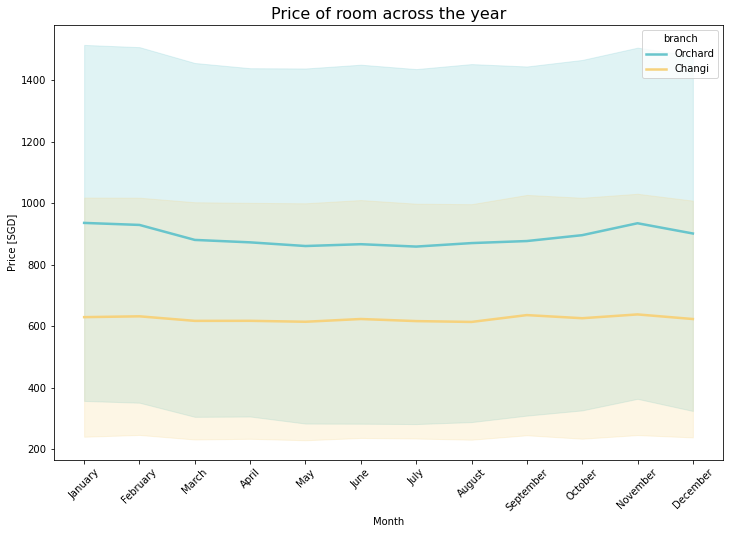

In [43]:
#Room prices across months
guests_shown = df.loc[df['no_show']==0]
df['arrival_month'] = df['arrival_date'].dt.strftime('%B')

room_price =df[['branch','arrival_month', 'SGD_amount']].sort_values('arrival_month')

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

room_price['arrival_month'] = pd.Categorical(room_price['arrival_month'],categories=months, ordered = True)

plt.figure(figsize = (12,8))
sns.lineplot(x ='arrival_month', 
             y = 'SGD_amount', 
             hue = 'branch', 
             data=room_price,
             hue_order = ['Orchard', 'Changi'],
             ci = "sd",
             size = "branch",
             sizes =(2.5,2.5),
             palette=['#68c5cc', '#f6d27d'])

plt.title("Price of room across the year", fontsize = 16)
plt.xlabel("Month")
plt.xticks(rotation = 45)
plt.ylabel('Price [SGD]')
plt.show()



In [44]:
#Room prices based on room type and branch
data = df[df['no_show'] == 0]

px.box(data_frame = data, 
       x = 'room', 
       y = 'SGD_amount', 
       color = 'branch',
       color_discrete_sequence=px.colors.qualitative.Pastel,
       template = 'xgridoff',
      title='Price of Rooms')

In [45]:
stay = df.groupby(['stay_duration', 'branch']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'booking_id':'Number of stays'})

px.bar(data_frame = stay, 
       x = 'stay_duration', 
       y = 'Number of stays', 
       color = 'branch', 
       barmode = 'group',
       color_discrete_sequence=px.colors.qualitative.Pastel2,
       template = 'xgridoff')

(4.0, 5.0)

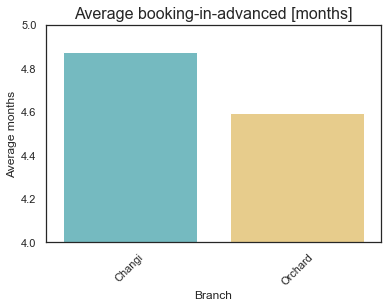

In [46]:
#Average months for booking in advanced

#set seaborn plotting aesthetics
sns.set(style='white')

y = df['book_duration'][df['no_show']==0]
x = df['branch']

#create grouped bar chart
sns.barplot(x=x, 
            y=y, 
            data=df,
            ci=None,
            palette=['#68c5cc', '#f6d27d'],
            label=True) 

plt.title('Average booking-in-advanced [months]', fontsize=16)
plt.xlabel('Branch')
plt.ylabel('Average months')
plt.xticks(rotation=45)
plt.ylim (4,5)

<h1>No-show Customers Visualisations</h1>

In [47]:
#Room prices based on room type and branch
data = df[df['no_show'] == 1]

px.box(data_frame = data, 
       x = 'room', 
       y = 'SGD_amount', 
       color = 'branch',
       color_discrete_sequence=px.colors.qualitative.Antique,
       template = 'xgridoff',
      title='Price of Rooms (loss incurred)')

In [48]:
#Orchard
monthlybooking_orchard = df_orchard['arrival_date'][df['no_show']==1].value_counts()
monthlybooking_orchard = monthlybooking_orchard.resample('m').sum().to_frame().reset_index()
monthlybooking_orchard.rename(columns = {'index' : 'months', 'arrival_date':'SGD_amount'}, inplace=True)

#Changi
monthlybooking_changi = df_changi['arrival_date'][df['no_show']==1].value_counts()
monthlybooking_changi = monthlybooking_changi.resample('m').sum().to_frame().reset_index()
monthlybooking_changi.rename(columns = {'index' : 'months', 'arrival_date':'SGD_amount'}, inplace=True)

#total
monthlybooking = df['arrival_date'][df['no_show']==1].value_counts()
monthlybooking = monthlybooking.resample('m').sum().to_frame().reset_index()
monthlybooking.rename(columns = {'index' : 'months', 'arrival_date':'SGD_amount'}, inplace=True)


fig = go.Figure()
fig.add_trace(go.Scatter(
    x=monthlybooking_orchard['months'], 
    y=monthlybooking_orchard['SGD_amount'], 
    name="Orchard",
    hovertemplate=f"<b>Orchard:</b><br>Date: %{{x}}<br>Loss Amount: $%{{y}}"))

fig.add_trace(go.Scatter(
    x=monthlybooking_changi['months'], 
    y=monthlybooking_changi['SGD_amount'], 
    name="Changi",
    hovertemplate=f"<b>Changi:</b><br>Date: %{{x}}<br>Loss Amount: $%{{y}}"))

fig.add_trace(go.Scatter(
    x=monthlybooking['months'], 
    y=monthlybooking['SGD_amount'], 
    name="Total",
    hovertemplate=f"<b>Total:</b><br>Date: %{{x}}<br>Loss Amount: $%{{y}}"))

fig.update_layout(title_text='Total loss amount incurred in SGD', 
                  title_x=0.5, 
                  title_font=dict(size=20),
                 plot_bgcolor="#fff0e4",
                 paper_bgcolor="#fff0e4",
                 
                 )

fig.update_layout(xaxis_title="Arrival Date", yaxis_title= "Total Amount $[SGD]")
fig.show()

In [49]:
#Dropping unnecssary columns that are not needed for ML algorithms
df = df.drop(columns=['arrival_month',
                      'total_guests',
                      'room',
                      'country',
                      'branch',
                      'arrival_date',
                      'checkout_date',
                      'booking_date'])

In [50]:
df.columns.tolist()

['booking_id',
 'no_show',
 'first_time',
 'num_adults',
 'num_children',
 'SGD_amount',
 'branch_Changi',
 'branch_Orchard',
 'country_Australia',
 'country_China',
 'country_India',
 'country_Indonesia',
 'country_Japan',
 'country_Malaysia',
 'country_Singapore',
 'room_King',
 'room_President Suite',
 'room_Queen',
 'room_Single',
 'platform_Agent',
 'platform_Email',
 'platform_Phone',
 'platform_Website',
 'book_duration',
 'stay_duration']

#exporting and updating "cleaned" data<br>
df.to_sql('noshow', conn, if_exists='replace')